In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
# Numpy Version: 1.19.4
# Pandas Version: 1.2.4
# Scipy Version: 1.5.4
# Plotly Version: 5.2.1
# Matplotlib Version: 3.3.4
# Seaborn Version: 0.11.1
# yfinance Version: 0.1.64
# Sklearn Version: 0.23.2

In [ ]:
start = '2007-01-01'
end = '2023-02-01'

In [ ]:
data = yf.download('^NSEI', start = start, end = end)
#data.to_csv('NiftyHistoricalData.csv')

# Import OHLC data of Nifty Index
#data = pd.read_csv('NiftyHistoricalData.csv', index_col=0)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = round(data, 2)

data['MeanReturn'] = data['Close'].pct_change().rolling(250).mean()
data['StdReturn'] = data['Close'].pct_change().rolling(250).std()
data = data.dropna()

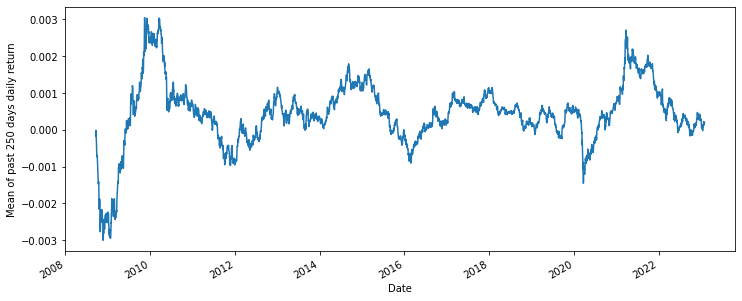

In [ ]:
data['MeanReturn'].plot(figsize=(12,5))
plt.ylabel('Mean of past 250 days daily return')
plt.savefig('003_001_MeanofReturn_for_entireDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

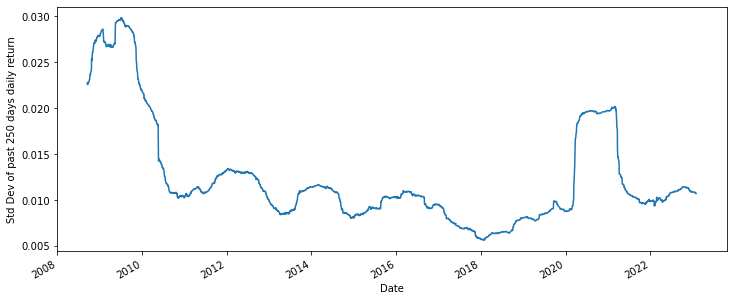

In [ ]:
data['StdReturn'].plot(figsize=(12,5))
plt.ylabel('Std Dev of past 250 days daily return')
plt.savefig('003_002_StdDeviationofReturn_for_entireDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

In [ ]:
split = 0.6
train = data.iloc[:int(data.shape[0]*split),:]
test = data.iloc[int(data.shape[0]*split):,:]

In [ ]:
# Apply KMeans algorithm with 4 clusters to identify the different regimes in the market
km = KMeans(n_clusters=4, random_state=123).fit(train[['MeanReturn', 'StdReturn']])

data.loc[:,'cluster'] = km.predict(data[['MeanReturn', 'StdReturn']])
train.loc[:,'cluster'] = km.predict(train[['MeanReturn', 'StdReturn']])
test.loc[:,'cluster'] = km.predict(test[['MeanReturn', 'StdReturn']])

data['legend'] = 'cluster_'+data['cluster'].astype(str)
train['legend'] = 'cluster_'+train['cluster'].astype(str)
test['legend'] = 'cluster_'+test['cluster'].astype(str)

hue_order = data['legend'].sort_values().unique()

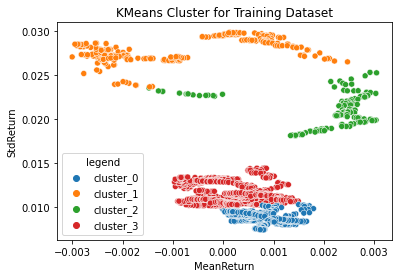

In [ ]:
sns.scatterplot(train['MeanReturn'], train['StdReturn'], hue=train['legend'], hue_order=hue_order)
plt.title('KMeans Cluster for Training Dataset')
plt.savefig('003_01_KMeansCluster_for_TrainingDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

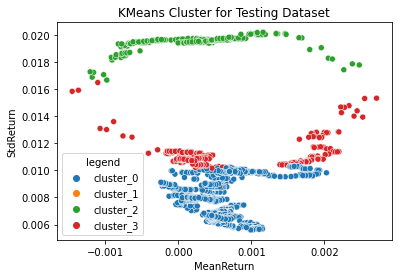

In [ ]:
sns.scatterplot(test['MeanReturn'], test['StdReturn'], hue=test['legend'], hue_order=hue_order)
plt.title('KMeans Cluster for Testing Dataset')
plt.savefig('003_02_KMeansCluster_for_TestingDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

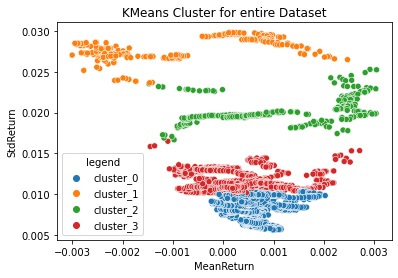

In [ ]:
sns.scatterplot(data['MeanReturn'], data['StdReturn'], hue=data['legend'], hue_order=hue_order)
plt.title('KMeans Cluster for entire Dataset')
plt.savefig('003_03_KMeansCluster_for_entireDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

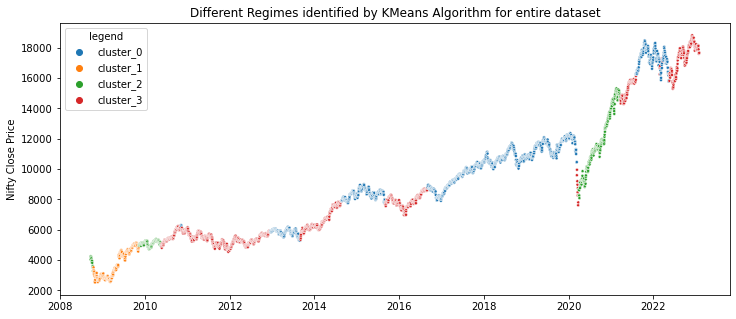

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=data.index.values, y=data['Close'], hue=data['legend'], hue_order=hue_order, marker='.')
plt.ylabel('Nifty Close Price')
plt.title('Different Regimes identified by KMeans Algorithm for entire dataset')
plt.savefig('003_04_Regime_EntireDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

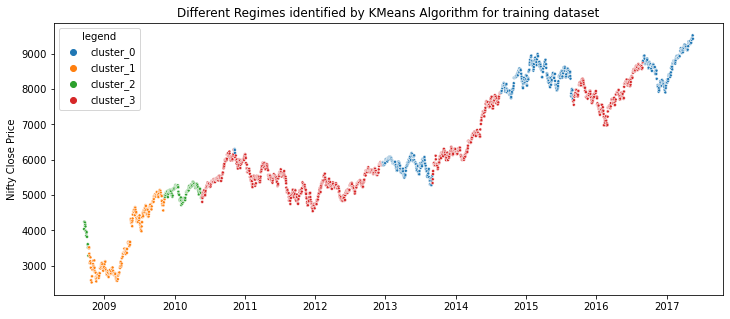

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=train.index.values, y=train['Close'], hue=train['legend'], hue_order=hue_order, marker='.')
plt.ylabel('Nifty Close Price')
plt.title('Different Regimes identified by KMeans Algorithm for training dataset')
plt.savefig('003_05_Regime_trainingDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)

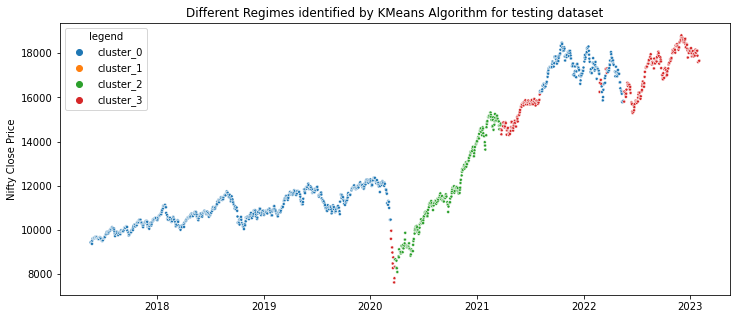

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=test.index.values, y=test['Close'], hue=test['legend'], hue_order=hue_order, marker='.')
plt.ylabel('Nifty Close Price')
plt.title('Different Regimes identified by KMeans Algorithm for testing dataset')
plt.savefig('003_06_Regime_TestingDataset.png', 
            bbox_inches='tight', padding=1, dpi=200)